In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
tdata = pd.read_csv('./tableinfo.csv', sep=";")
tdata


,table,values,distinct_values,mean_cardinality,avg_cell_len,avg_tableid,avg_colid,avg_rowid
0,mate_main_tokenized,37849251,0,inf,0.000000,7.257179e+07,4.684806,1.528314e+02
1,main_tokenized_embedding,87700361,768260,114.154532,1.711494,6.775167e+07,9.074454,5.946968e+01
2,main_tokenized,101529655,768260,132.155332,1.614582,6.977859e+07,9.646693,5.257549e+01
3,cocoa_main_tokenized,112772902,768260,146.790022,1.553309,7.500609e+07,9.732021,5.942166e+01
4,open_data_mate_main_tokenized,274658645,9940801,27.629428,8.696761,5.185624e+03,682.581300,6.013763e+04
5,open_data_main_tokenized,799930934,19776045,40.449490,7.986371,9.939454e+03,267.581213,1.058475e+06
6,gittables_main_tokenized,1588021298,97488581,16.289306,12.468851,8.494823e+05,18.848094,4.767343e+02


In [8]:
import os

histo = dict()
histopath = "./Histograms/"
for file in os.listdir(histopath):
    table = file[:-4]
    data = pd.read_csv(histopath + file, sep=';')
    histo[table] = data

data


,rows,cols,tableids
0,0,0,0
1,30981034,690106040,3552
2,25834680,323276430,1652
3,46542452,254530460,750
4,82661770,164895189,6534
...,...,...,...
59,0,0,0
60,0,0,0
61,0,0,0
62,0,0,0


KeyError: 'rows'

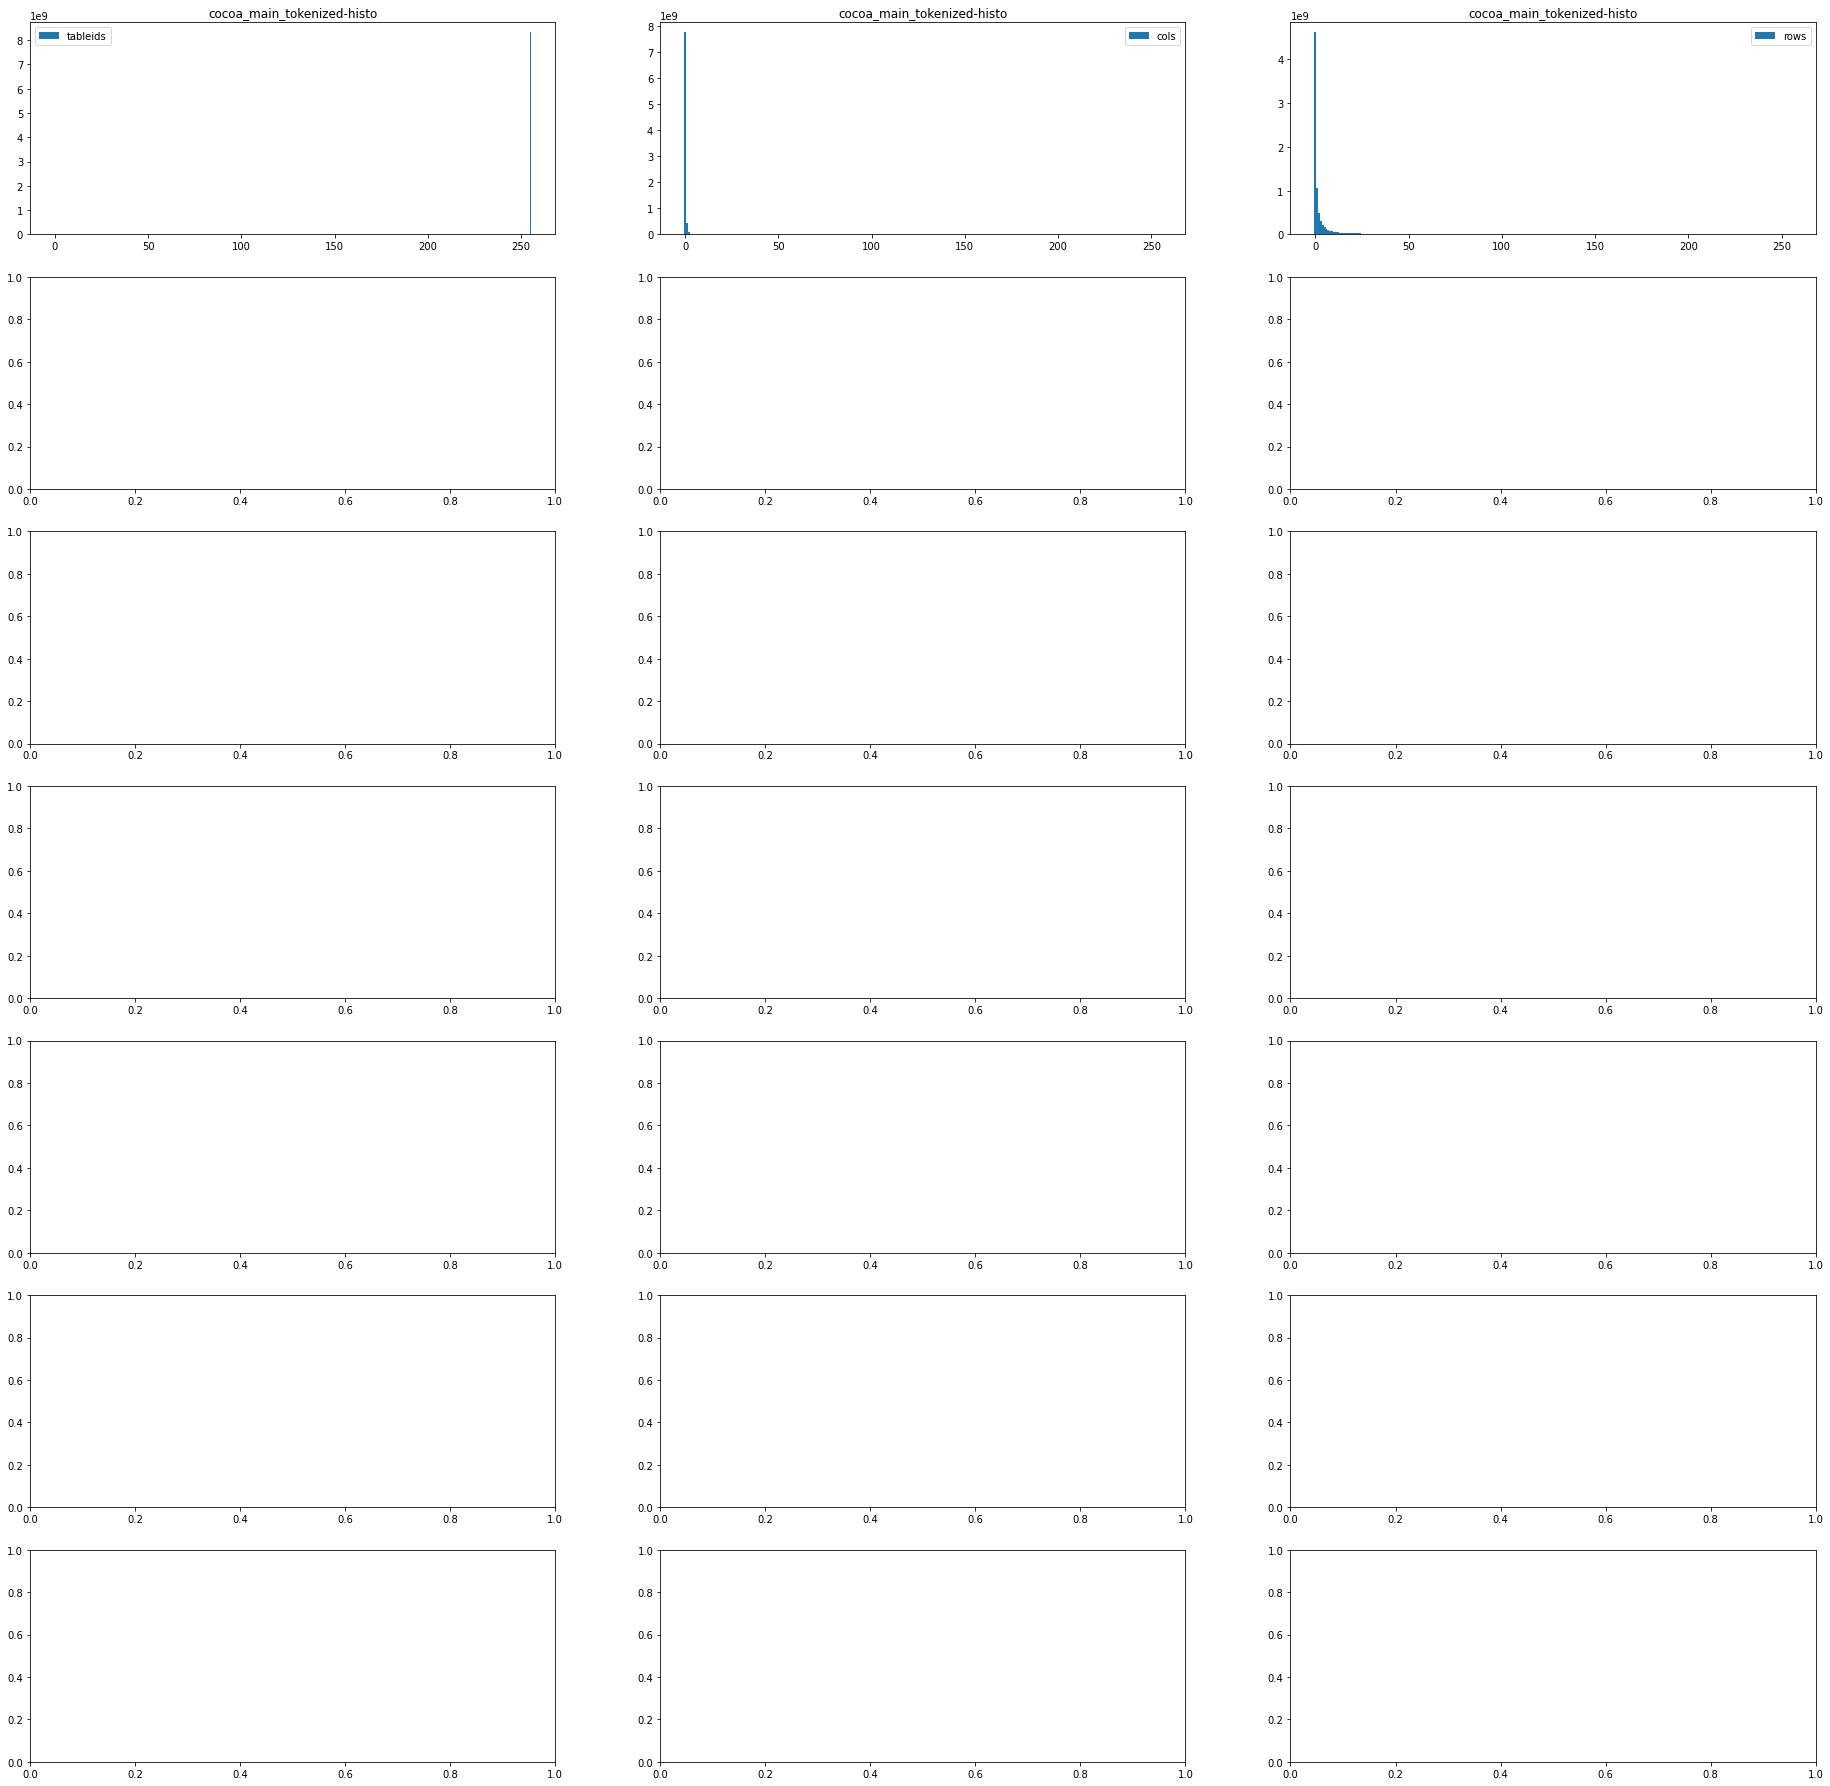

In [9]:
# draw histograms

fig, axss = plt.subplots(7, 3, figsize=(32, 32))

# axs = [item for sublist in axss for item in sublist]


i = 0
for table, h in histo.items():
    axs = axss[i]
    count = len(h['rows'])
    n = 0
    for id in ["tableids", "cols", "rows"]:
        ax = axs[n]
        n += 1
        ax.set_title(table)
        # TODO make this times 16
        ax.bar(range(count), h[id], width=1, label=id)
        ax.legend()
    i += 1
